In [35]:
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [36]:
df = pd.read_pickle('merged_df2.pkl')

In [37]:
df.columns

Index(['drug_name', 'generic_name', 'grx_lowest_price', 'grx_pharmacy',
       'grx_purchase', 'grx_lowest_price_adj', 'chem_name',
       'affected_organisms', 'chem_state', 'chem_class', 'drug_group',
       'drug_type', 'chem_kingdom', 'molecular_framework',
       'avg_molecular_weight', 'num_clinical_trials', 'num_dosage_forms',
       'num_drug_interactions', 'num_food_interactions',
       'num_manufacturers_for_chem', 'num_packagers_for_chem',
       'num_patents_on_chem', 'num_targets', 'chem_sub_class',
       'chem_super_class', 'nadac_cost_per_unit'],
      dtype='object')

In [38]:
df.head()

,drug_name,generic_name,grx_lowest_price,grx_pharmacy,grx_purchase,grx_lowest_price_adj,chem_name,affected_organisms,chem_state,chem_class,...,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,chem_sub_class,chem_super_class,nadac_cost_per_unit
0,Cuprimine,Non-Existant,31215.00,Costco,120 capsules of Cuprimine 250mg,260.125000,Penicillamine,Humans and other mammals,Solid,Carboxylic acids and derivatives,...,6.0,239.0,2.0,2.0,7.0,0.0,0.0,"Amino acids, peptides, and analogues",Organic acids and derivatives,23.09959
1,Sovaldi,Sofosbuvir,27813.00,Costco,28 tablets of Sovaldi 400mg,993.321429,Sofosbuvir,Hepatitis C Virus,Solid,Pyrimidine nucleosides,...,5.0,346.0,1.0,0.0,0.0,23.0,0.0,Pyrimidine 2\'-deoxyribonucleosides,"Nucleosides, nucleotides, and analogues",965.56364
2,Sofosbuvir,Sovaldi,27728.00,Hy Vee,28 tablets of Sovaldi 400mg,990.285714,Sofosbuvir,Hepatitis C Virus,Solid,Pyrimidine nucleosides,...,5.0,346.0,1.0,0.0,0.0,23.0,0.0,Pyrimidine 2\'-deoxyribonucleosides,"Nucleosides, nucleotides, and analogues",965.56364
3,Ribavirin,"Copegus,Rebetol",157.52,Hy Vee,168 capsules of ribavirin 200mg,0.937619,Ribavirin,"Hepatitis B virus, Hepatitis C virus, RSV and ...",Solid,Triazole ribonucleosides and ribonucleotides,...,24.0,708.0,0.0,9.0,22.0,9.0,7.0,Not Available,"Nucleosides, nucleotides, and analogues",0.67822
4,Copegus,Ribavirin,27.68,Albertsons,30 tablets of ribavirin 200mg,0.922667,Ribavirin,"Hepatitis B virus, Hepatitis C virus, RSV and ...",Solid,Triazole ribonucleosides and ribonucleotides,...,24.0,708.0,0.0,9.0,22.0,9.0,7.0,Not Available,"Nucleosides, nucleotides, and analogues",0.67822


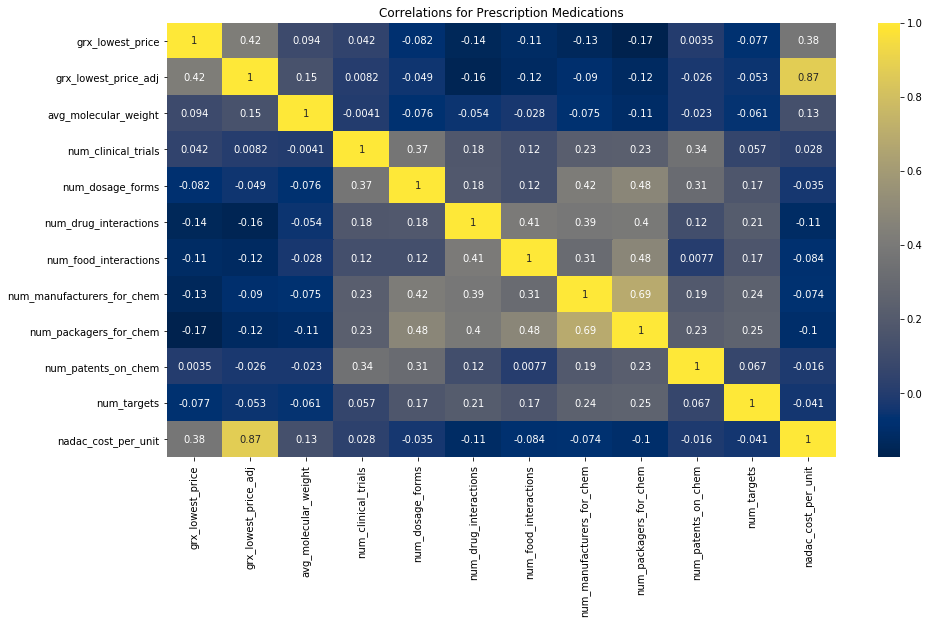

In [39]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), cmap = 'cividis', annot = True)
plt.title('Correlations for Prescription Medications');
plt.savefig('Correlation Matrix for Prescription Medications.png')

In [40]:
aggregations = {
    'grx_lowest_price_adj': 'mean',
    'drug_name': 'count'
    }

df2 = df.groupby(['chem_class']).agg(aggregations).reset_index()

In [41]:
df2.sort_values(by = 'grx_lowest_price_adj', ascending = True).head()

,chem_class,grx_lowest_price_adj,drug_name
49,Homogeneous halogens,0.096444,2
61,Lactones,0.133333,4
20,Benzothiadiazoles,0.156556,2
36,Coumarins and derivatives,0.235667,2
48,Furofurans,0.250778,4


In [42]:
aggregations = {
    'num_drug_interactions': 'mean',
    }

df3 = df.groupby(['drug_type', 'chem_state']).agg(aggregations).reset_index()

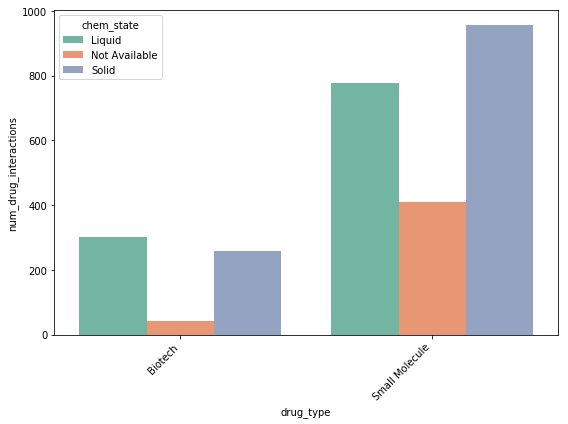

In [43]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x = 'drug_type', y = 'num_drug_interactions',
                    data = df3, hue = 'chem_state', palette = 'Set2')
# ax.set_title('_______')
# ax.set_xlabel('_______')
# ax.set_ylabel('_______')
ax.set_xticklabels(df3['drug_type'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


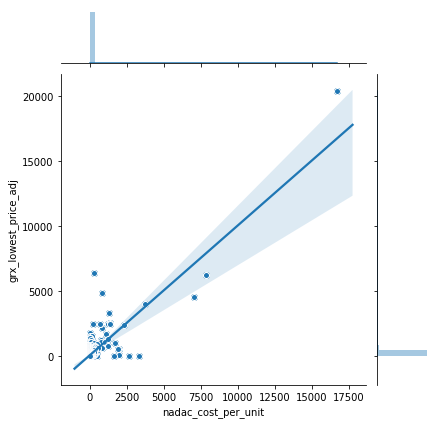

In [44]:
ax = sns.jointplot(x = 'nadac_cost_per_unit',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


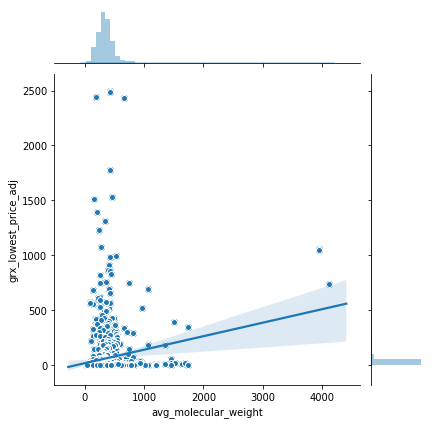

In [45]:
ax = sns.jointplot(x = 'avg_molecular_weight',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


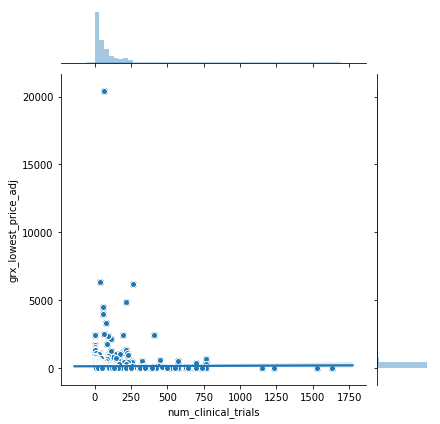

In [46]:
ax = sns.jointplot(x = 'num_clinical_trials',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


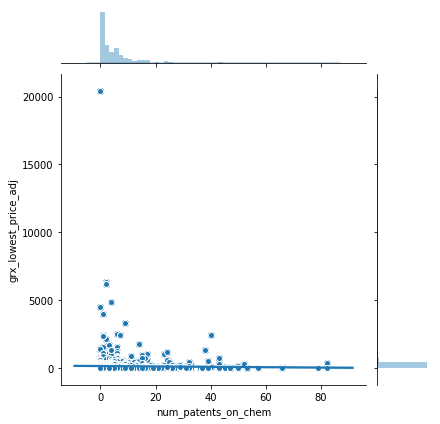

In [47]:
ax = sns.jointplot(x = 'num_patents_on_chem',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

In [48]:
df = deepcopy(df[((df['num_targets'].isnull() == False) \
                  & (df['avg_molecular_weight'].isnull() == False) \
                  & (df['chem_kingdom'] != 'Not Available') \
                  & (df['chem_state'] != 'Not Available'))])

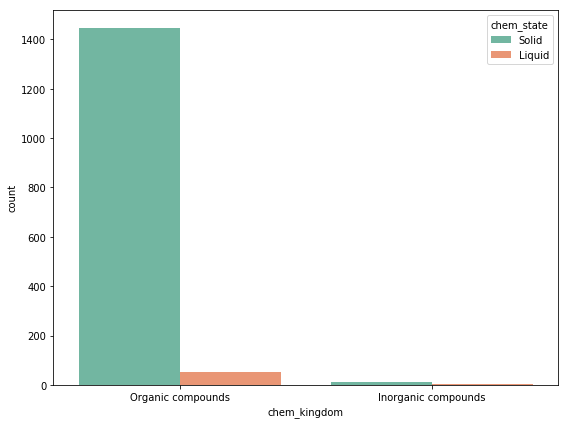

In [49]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(x = 'chem_kingdom', hue = 'chem_state',
                 data = df, palette = 'Set2')
# ax.set_title('_______')
# ax.set_xlabel('Average Molecular Weight')
# ax.set_ylabel('GRX Lowest Price (Adjusted)')
# ax.set_xticklabels('_______', 
#                    rotation = 45, ha = "right")

plt.tight_layout()

In [50]:
aggregations = {
    'grx_lowest_price_adj': 'mean',
    }

df4 = df.groupby(['chem_kingdom', 'chem_state']).agg(aggregations).reset_index()

In [51]:
df4.sort_values(by = 'grx_lowest_price_adj', ascending = True).head()

,chem_kingdom,chem_state,grx_lowest_price_adj
0,Inorganic compounds,Liquid,2.085000
1,Inorganic compounds,Solid,14.351720
3,Organic compounds,Solid,55.598534
2,Organic compounds,Liquid,173.117713


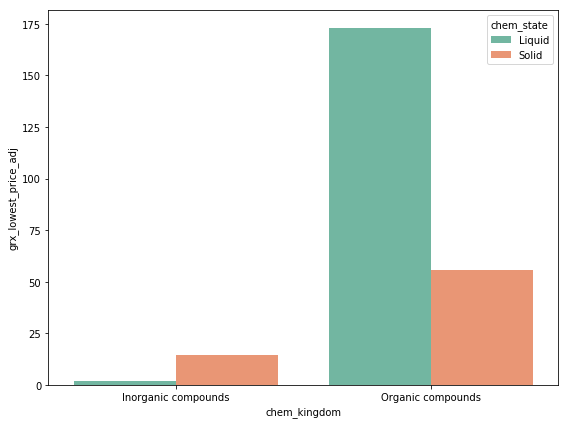

In [52]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x = 'chem_kingdom', y = 'grx_lowest_price_adj', hue = 'chem_state',
                 data = df4, palette = 'Set2')
# ax.set_title('_______')
# ax.set_xlabel('Average Molecular Weight')
# ax.set_ylabel('GRX Lowest Price (Adjusted)')
# ax.set_xticklabels('_______', 
#                    rotation = 45, ha = "right")

plt.tight_layout()

In [53]:
nadac_year_df = pd.read_pickle('nadac_year_df.pkl')

In [54]:
nadac_year_df.columns

Index(['year', 'OTC', 'NADAC_Per_Unit'], dtype='object')

In [55]:
nadac_year_df

,year,OTC,NADAC_Per_Unit
0,2013,N,2.358686e+06
1,2013,Y,1.692711e+04
2,2014,N,1.047638e+07
3,2014,Y,5.406013e+04
4,2015,N,1.186847e+07
5,2015,Y,6.338715e+04
6,2016,N,1.131926e+07
7,2016,Y,5.598029e+04
8,2017,N,1.190788e+07
9,2017,Y,5.909460e+04


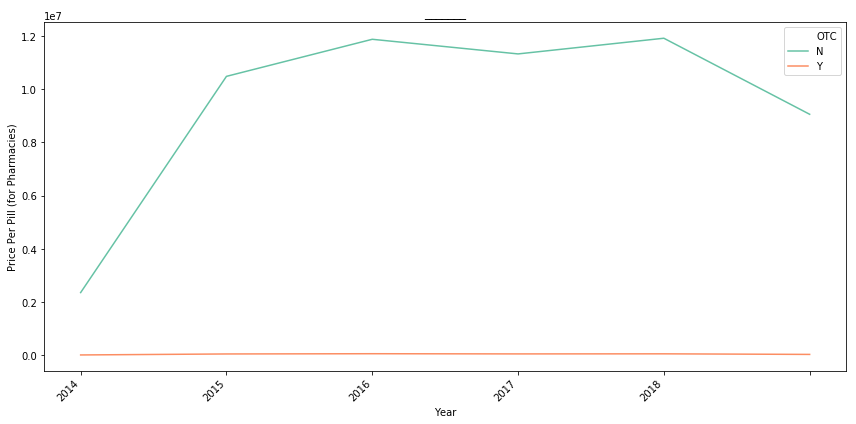

In [56]:
plt.figure(figsize = (12, 6))

ax = sns.lineplot(x = 'year',  y = 'NADAC_Per_Unit', hue = 'OTC',
                 data = nadac_year_df, palette = 'Set2')
ax.set_title('_______')
ax.set_xlabel('Year')
ax.set_ylabel('Price Per Pill (for Pharmacies)')
ax.set_xticklabels(nadac_year_df['year'].unique(),
                   rotation = 45, ha = "right")

plt.tight_layout()